In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

## 0. Load Files

In [2]:
# Load Train & Test files
train = pd.read_csv("./data/train-file.csv")
test = pd.read_csv("./data/test-file.csv")
sample = pd.read_csv("./data/sample-submission.csv")

In [3]:
sample.head()

,ID,Is_Lead
0,VBENBARO,0
1,CCMEWNKY,0
2,VK3KGA9M,0
3,TT8RPZVC,0
4,SHQZEYTZ,0


In [4]:
# Check Train file
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [6]:
train.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   105312 non-null  object
 1   Gender               105312 non-null  object
 2   Age                  105312 non-null  int64 
 3   Region_Code          105312 non-null  object
 4   Occupation           105312 non-null  object
 5   Channel_Code         105312 non-null  object
 6   Vintage              105312 non-null  int64 
 7   Credit_Product       92790 non-null   object
 8   Avg_Account_Balance  105312 non-null  int64 
 9   Is_Active            105312 non-null  object
dtypes: int64(3), object(7)
memory usage: 8.0+ MB


In [8]:
test.describe()

,Age,Vintage,Avg_Account_Balance
count,105312.000000,105312.000000,1.053120e+05
mean,43.871002,46.842819,1.134195e+06
std,14.872890,32.273634,8.662430e+05
min,24.000000,7.000000,2.259700e+04
25%,30.000000,20.000000,6.039822e+05
50%,43.000000,32.000000,8.966345e+05
75%,54.000000,73.000000,1.371598e+06
max,85.000000,135.000000,9.908858e+06


#### Key Inferences

* There are 2,45,725 records in Train and 1,05,312 records in Test files.
* There are 11 Columns in Train file.
* The datatypes of all the columns are mathing to their respective values inside. No need to modify the data types.

## 1. Data preprocess

### 1.1 Check for Single Value and Unique Value Columns

In [9]:
# Print the no of unique values in each column
unique_counts = []
for col, dtyp in zip(train.columns, train.dtypes):
    ucnt = train[col].nunique()
    if ucnt > 5:
        unique_counts.append({"Column": col, "dataType": dtyp, "Unique Count": ucnt, "Unique Values": "<multiple>"})
    else:
        unique_counts.append({"Column": col, "dataType": dtyp, "Unique Count": ucnt, "Unique Values": train[col].unique()})
    
pd.DataFrame(unique_counts)

,Column,dataType,Unique Count,Unique Values
0,ID,object,245725,<multiple>
1,Gender,object,2,"[Female, Male]"
2,Age,int64,63,<multiple>
3,Region_Code,object,35,<multiple>
4,Occupation,object,4,"[Other, Salaried, Self_Employed, Entrepreneur]"
5,Channel_Code,object,4,"[X3, X1, X2, X4]"
6,Vintage,int64,66,<multiple>
7,Credit_Product,object,2,"[No, nan, Yes]"
8,Avg_Account_Balance,int64,135292,<multiple>
9,Is_Active,object,2,"[No, Yes]"


#### Key Inferences
* Column ID is of Object type and has all unique values which is not useful for ML modelling.
* Rest all good candidates for further processing.
* Train dataset has both Categorical and Numerical columns.
* Categorical Columns: Gender, Region_Code, Occupation, Channel_Code, Credit_Product, Is_Active.
* Numerical Columns: Age, Vintage, Avg_Account_Balance
* Target Column: Is_Lead

### 1.2. Check for missing values

In [10]:
# Get No of missing values in each Column - Train
train.isnull().sum(axis = 0)

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [11]:
# Get No of missing values in each Column - Test
test.isnull().sum(axis = 0)

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

#### Key Inferences
* Expect Column Credit_Product, rest all the columns are not having any missing values in both Train  & Test datasets.
* There are missing values in Credit_Product which is significantly high (11.93%).
* Choosing the right missing value will seriously affect the final prediction.
* So it is important to replace the missing values based on the majority groups.

In [12]:
train.groupby("Credit_Product")["ID"].count()

Credit_Product
No     144357
Yes     72043
Name: ID, dtype: int64

In [13]:
# For timebeing lets replace NaN with Unknown for further analysis.
train["Credit_Product"] = train["Credit_Product"].fillna("Uknown")
test["Credit_Product"] = test["Credit_Product"].fillna("Unknown")

In [14]:
train.groupby(by=["Credit_Product", "Occupation", "Is_Lead"])["ID"].count()

Credit_Product  Occupation     Is_Lead
No              Entrepreneur   0              2
                Other          0          36526
                               1           2899
                Salaried       0          49035
                               1           3388
                Self_Employed  0          48171
                               1           4336
Uknown          Entrepreneur   0            146
                               1            870
                Other          0           1554
                               1           7773
                Salaried       0            287
                               1           3929
                Self_Employed  0           2363
                               1          12403
Yes             Entrepreneur   0            757
                               1            892
                Other          0          14904
                               1           6517
                Salaried       0          11181
 

In [15]:
# Get the mode of majority
train_major_grp = train.groupby(by=["Gender", "Channel_Code", "Occupation"])["Credit_Product"].agg(lambda x:x.value_counts().index[0]).reset_index()
test_major_grp = train.groupby(by=["Gender", "Channel_Code", "Occupation"])["Credit_Product"].agg(lambda x:x.value_counts().index[0]).reset_index()

In [16]:
train_adj = pd.merge(train, train_major_grp, on=["Gender", "Channel_Code", "Occupation"], how="left")
test_adj = pd.merge(test, test_major_grp, on=["Gender", "Channel_Code", "Occupation"], how="left")

In [17]:
train_adj["Credit_Product"] = train_adj.Credit_Product_x.fillna(train_adj.Credit_Product_y)
test_adj["Credit_Product"] = test_adj.Credit_Product_x.fillna(test_adj.Credit_Product_y)

## 2. Exploratory Data Analysis

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

In [19]:
cat_cols = ["Gender", "Region_Code", "Occupation", "Channel_Code", "Credit_Product", "Is_Active"]
num_cols = ["Age", "Vintage", "Avg_Account_Balance"]

In [20]:
# It is important to convert the Categorical columns into numerical before Correlation test
# Lets convert the Categorical Values into numerical

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer


train_cat = train_adj[cat_cols]
train_num = train_adj[num_cols]
train_target = train_adj[["Is_Lead"]]

# Encoder for Categorical Columns
encoder = ColumnTransformer(
    transformers=[
        ('cat', OrdinalEncoder(dtype = np.int64,handle_unknown="use_encoded_value", unknown_value=999999), cat_cols),
    ])

_encoded = encoder.fit_transform(train_cat)
train_cat_encoded = pd.DataFrame(_encoded, columns=cat_cols)

train_encoded = pd.concat([train_cat_encoded, train_num, train_target], axis=1)
train_encoded.head()

,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Is_Active,Age,Vintage,Avg_Account_Balance,Is_Lead
0,0,18,1,2,0,0,73,43,1045696,0
1,0,27,2,0,0,0,30,32,581988,0
2,0,18,3,2,0,1,56,26,1484315,0
3,1,20,2,0,0,0,34,19,470454,0
4,0,32,2,0,0,0,30,33,886787,0


In [21]:
test_cat = test_adj[cat_cols]
test_num = test_adj[num_cols]

_encoded2 = encoder.transform(test_cat)
test_cat_encoded = pd.DataFrame(_encoded2, columns=cat_cols)

test_encoded = pd.concat([test_cat_encoded, test_num], axis=1)
test_encoded.head()

,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Is_Active,Age,Vintage,Avg_Account_Balance
0,1,4,1,0,2,0,29,25,742366
1,1,18,1,1,999999,0,43,49,925537
2,1,20,2,0,0,0,31,14,215949
3,1,22,1,0,0,0,29,33,868070
4,0,20,1,0,0,0,29,19,657087


### 2.1. Data Distribution

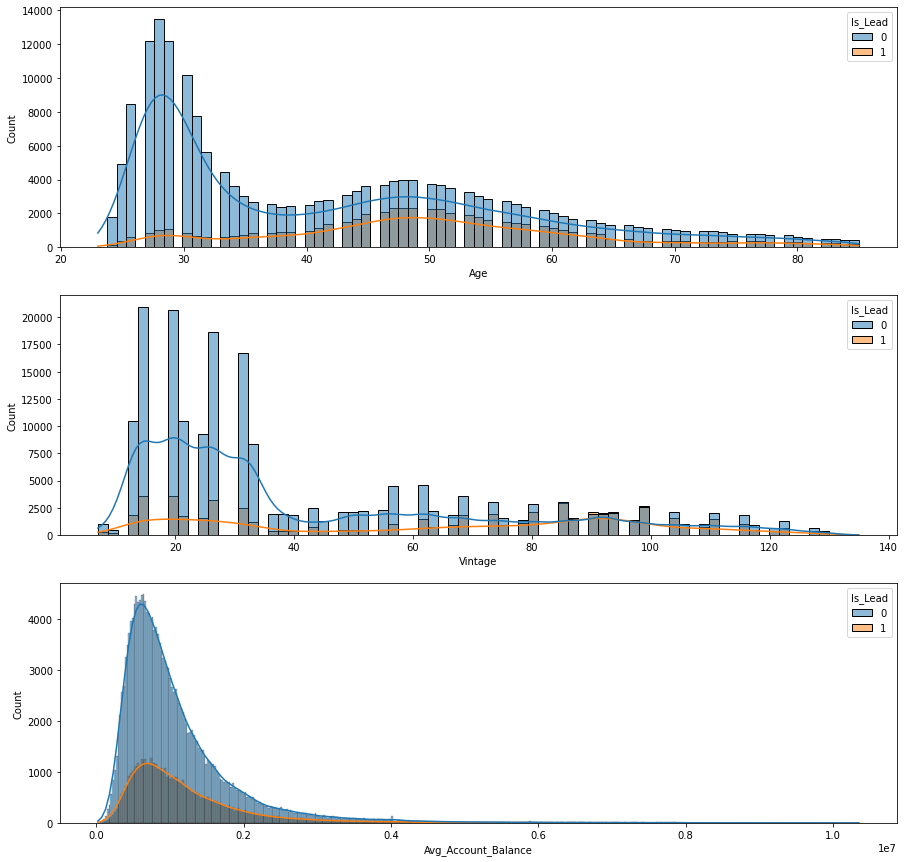

In [22]:
# Lets look at the data distribiton of Numerical Columns
fig, axs = plt.subplots(nrows=3, figsize=(15,15))
for col in num_cols:
    sns.histplot(data=train_encoded, x=col, hue="Is_Lead", ax=axs[num_cols.index(col)], kde=True)

#### Key Inferences
* The data distribution of Numerical Variables are positively skewed.
* So it is important to choose Non-parameteric tools for correlation testing and ML Modeling.
* Age & Vintage are having better correlation compaired to Avg_Account_Balance.

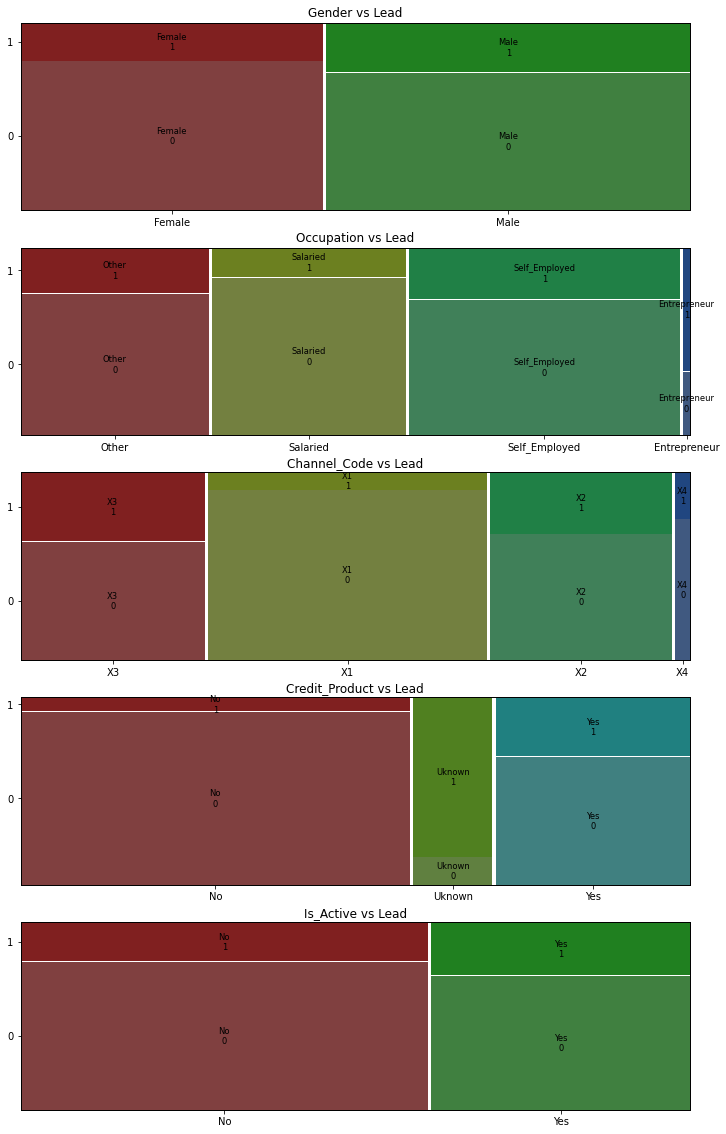

In [23]:
# Lets look at the data distribiton of Categorical Columns
fig, axs = plt.subplots(nrows=5, figsize=(12,20))
i = 0
for col in cat_cols:
    if train_encoded[col].nunique() < 5:
        mosaic(train, [col, 'Is_Lead'], ax=axs[i], title=col + " vs Lead")
        i += 1

#### Key Inferences
* The data distribution of categorial columns among their categories are not some.
* Channel_code, Occupation are showing high variation with Is_Lead compared to other Categorical values.
* Credit_Product chart indicates that the customers having credit products already has shown interests (lead) to get credit card compaired to those not having a credit product previously. 

### 2.2. Correlation Testing

<AxesSubplot:>

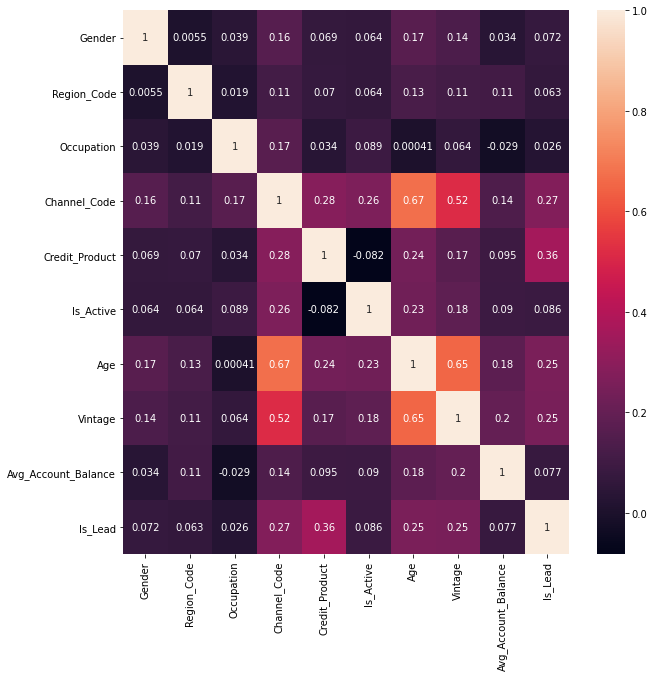

In [24]:
# print the Correlation Matrix
plt.figure(figsize=(10,10))
sns.heatmap(train_encoded.corr(method="spearman"), annot=True)

In [25]:
# Chi-Squre Test


### 2.4. Treating missing values for Credit_Product

## 3. ML Model Building

In [26]:
from sklearn.naive_bayes import MultinomialNB, CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import StratifiedKFold

In [27]:
from lightgbm import LGBMClassifier

In [45]:
def model_cross_validation(X, y, splits, model, params):
    kf = StratifiedKFold(n_splits=splits, shuffle=True, random_state=145)
    
    for step, (train_idx, test_idx) in enumerate(kf.split(X, y)):
        print(f"\nStep - {step+1}")
        
        X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]
        
        classifier = model(**params)
        classifier.fit(X_train, y_train, 
                       eval_set=[(X_test, y_test)],
                       early_stopping_rounds=100,
                       verbose=400)
        
        pred = classifier.predict(X_test)
        prob = classifier.predict_proba(X_test)[:, 1]
        accuracy = accuracy_score(y_test, pred)
        print(f"accuracy : {accuracy_score(y_test, pred)}")
        print(f"precision : {precision_score(y_test, pred)}")
        print(f"recall : {recall_score(y_test, pred)}")
        print(f"roc_auc_score : {roc_auc_score(y_test, prob)}")
        
        print("="*75)
    
    return classifier

In [47]:
# sel_cols = ["Gender", "Region_Code", "Occupation", "Channel_Code", 
#             "Credit_Product", "Is_Active", "Age", "Vintage", "Avg_Account_Balance"]
# sel_cols = ['Gender','Region_Code','Occupation','Channel_Code','Credit_Product','Is_Active']
sel_cols = ['Age','Vintage', 'Occupation', 'Channel_Code','Credit_Product']

In [48]:
params = { 'boosting_type': 'gbdt',
          'n_estimators': 8000,
          'learning_rate': 0.025, 
          'num_leaves':  18,
          'eval_metric': 'auc'
         }
lgbm_model = model_cross_validation(train_encoded[sel_cols], train_encoded.Is_Lead, 10, LGBMClassifier, params)
# lgbm_model = cross_val(train_encoded[sel_cols], train_encoded.Is_Lead, LGBMClassifier, params)


Step - 1
[LightGBM] [Warning] Unknown parameter: eval_metric
Training until validation scores don't improve for 100 rounds
[400]	valid_0's binary_logloss: 0.353494
Early stopping, best iteration is:
[653]	valid_0's binary_logloss: 0.353318
accuracy : 0.8584218451145567
precision : 0.809536354056902
recall : 0.5271916280665637
roc_auc_score : 0.8660694496522641

Step - 2
[LightGBM] [Warning] Unknown parameter: eval_metric
Training until validation scores don't improve for 100 rounds
[400]	valid_0's binary_logloss: 0.344936
Early stopping, best iteration is:
[439]	valid_0's binary_logloss: 0.344904
accuracy : 0.8615553656452204
precision : 0.8311050477489768
recall : 0.5225596157145308
roc_auc_score : 0.8726440794101519

Step - 3
[LightGBM] [Warning] Unknown parameter: eval_metric
Training until validation scores don't improve for 100 rounds
[400]	valid_0's binary_logloss: 0.348061
Early stopping, best iteration is:
[628]	valid_0's binary_logloss: 0.348001
accuracy : 0.8599275627721483


In [49]:
train_lgbm_pred = lgbm_model.predict(train_encoded[sel_cols])
train_lgbm_prob = lgbm_model.predict_proba(train_encoded[sel_cols])
print("LGBM - Accuracy ", accuracy_score(train_encoded.Is_Lead, train_lgbm_pred))
print("LGBM - ROC AUC ", roc_auc_score(train_encoded.Is_Lead, train_lgbm_prob[:,1]))
print("\nLGBM - Confusion Matrix\n", confusion_matrix(train_encoded.Is_Lead, train_lgbm_pred))

LGBM - Accuracy  0.8602746973242446
LGBM - ROC AUC  0.8735506751185225

LGBM - Confusion Matrix
 [[180971   6466]
 [ 27868  30420]]


In [50]:
cnb = CategoricalNB()
clf_cnb = cnb.fit(train_encoded[sel_cols], train_encoded.Is_Lead)
train_cnb_pred = clf_cnb.predict(train_encoded[sel_cols])
train_cnb_pred_prob = clf_cnb.predict_proba(train_encoded[sel_cols])

print("CNB - Accuracy ", accuracy_score(train_encoded.Is_Lead, train_cnb_pred))
print("CNB - ROC AUC ", roc_auc_score(train_encoded.Is_Lead, train_cnb_pred_prob[:,1]))
print("\nCNB - Confusion Matrix\n", confusion_matrix(train_encoded.Is_Lead, train_cnb_pred))

CNB - Accuracy  0.8098443381829281
CNB - ROC AUC  0.7554780425620942
CNB - ROC AUC  0.8352426694443357

CNB - Confusion Matrix
 [[160993  26444]
 [ 20282  38006]]


In [51]:
combine_prob = (train_lgbm_prob[:,1] + train_cnb_pred_prob[:,1]) / 2
print("Combined - ROC AUC ", roc_auc_score(train_encoded.Is_Lead, combine_prob))

Combined - ROC AUC  0.8623644970824206


In [70]:
test_cnb_prob = clf_cnb.predict_proba(test_encoded[sel_cols])[:,1]

IndexError: index 999999 is out of bounds for axis 1 with size 3

In [69]:
test_lgbm_prob = lgbm_model.predict_proba(test_encoded[sel_cols])[:,1]
test_cnb_prob = clf_cnb.predict_proba(test_encoded[sel_cols])[:,1]
test["Is_Lead"] = (test_lgbm_prob + test_cnb_prob) / 2
print(test.head())
test[["ID", "Is_Lead"]].to_csv("combined_predict_probabilities.csv", index=False)

IndexError: index 999999 is out of bounds for axis 1 with size 3

In [56]:
for col in test_encoded.columns:
    print(test.loc[test[col] == 1])

Empty DataFrame
Columns: [ID, Gender, Age, Region_Code, Occupation, Channel_Code, Vintage, Credit_Product, Avg_Account_Balance, Is_Active]
Index: []
Empty DataFrame
Columns: [ID, Gender, Age, Region_Code, Occupation, Channel_Code, Vintage, Credit_Product, Avg_Account_Balance, Is_Active]
Index: []
Empty DataFrame
Columns: [ID, Gender, Age, Region_Code, Occupation, Channel_Code, Vintage, Credit_Product, Avg_Account_Balance, Is_Active]
Index: []
Empty DataFrame
Columns: [ID, Gender, Age, Region_Code, Occupation, Channel_Code, Vintage, Credit_Product, Avg_Account_Balance, Is_Active]
Index: []
Empty DataFrame
Columns: [ID, Gender, Age, Region_Code, Occupation, Channel_Code, Vintage, Credit_Product, Avg_Account_Balance, Is_Active]
Index: []
Empty DataFrame
Columns: [ID, Gender, Age, Region_Code, Occupation, Channel_Code, Vintage, Credit_Product, Avg_Account_Balance, Is_Active]
Index: []
Empty DataFrame
Columns: [ID, Gender, Age, Region_Code, Occupation, Channel_Code, Vintage, Credit_Product,